 # Pandas                                  

                                                                                                      Cheik Samassa
                                                                                                  Marion Mennessier
                                                                                                           M1 MEDAS



#### Introduction

Pandas est une librairie Python développée par Wes McKinney offrant des structures de données flexibles dont l'utilisation est à la fois pratique et intuitive. 

Le but de cette librairie est de devenir l’outil de data analyse/manipulation disponible le plus puissant, complet et flexible. 
Aucun outil avant lui n’avait pu égaler les fonctionnalités du langage R (et sa facilité d’utilisation) que Pandas a l’ambition de compléter tout en utilisant les bonne idées.

Pour utiliser Pandas il faut l'installer si on ne l'a pas déjà  on l'install à l'aide  du pip ou conda (sur jhub ou la suite anaconda on l'a déjà il suffit de l'importer)


import pandas as pd  il s'agit de l'allias le plus répandu pour pandas
                     lorsqu'on voudra utiliser une des fonctions il suffira de faire


    pd.fonction  

au lieu de 
    
    pandas.fonction


Pandas permet d’utiliser différentes catégories de données:

* Des données tabulaires ayant des colonnes de types hétérogènes: des tables sql ou des feuilles excel par exemple

* Des données matricielles de type homogène ou hétérogènes 

* Tout type de jeux de données, d’observations

* Des données ordonnées et non ordonnées  de séries temporelles


on va importer par exemple un fichier csv et un excel

tableaucsv= pd.read_csv('fichier.csv', 'séparateur')

tableauexcel= pd.read_excel('fichier.xls', 'nom de la feuille')

En réalité ces fonctions prennent bien plus qu'un argument, mais spécifier ces deux là est indispensable à moins que le tableau n'ait qu'une seule colonne (un séparateur n'est pas nécessaire dans ce cas). 


Les deux principales structures de données Pandas sont les pandas series, et les pandas dataframes

* Le DataFrame est une une structure de donnée à deux dimension ayant des colonnes labelisées de potentiellement différents types. C’est un peu comme une table SQL ou une feuille (Excel ou ou autre spreadsheets). C’est l’objet pandas le plus utilisé en général

* Les Series sont des tableau d’une dimension capables de contenir tout type de données:
 integers, strings, floats etc…

Concrètement un pandas series c'est un tableau d'une colonne et plusieurs lignes, un dataframes c'est un tableau de plusieurs colonnes et plusieurs lignes. 

Autrement dit un Dataframe contient plusieurs Pandas Series correspondant chacun à une colonne.

D'ailleurs les différentes colonnes du dataframe sont stockées en mémoire en tant que collection de pandas series


#### Créer un DataFrame

Pour créer un Dataframe on utilise la fonction: pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False):

On va importer un dictionnaire c'est le plus simple (c'est les exemples qu'on retrouve dans la documentation
On crée le dictionnaire Europe qui va contenir des pays et leurs capitales

chaque élément du dictionnaire va contenir une liste de différents pays/capitales



In [33]:
import pandas as pd

print(pd.DataFrame([[1,2,3,4,5],
              ["A","B","C","D","E"]], 
             index= ['UN','DEUX'], 
             columns=['a','b','c','d','e']))

print()
Europe= { 'Pays': ['Belgique', 'France', 'Espagne', 'Allemagne'], 
         'Capitale': ['Bruxelles','Paris', 'Madrid', 'Berlin']}

tableau_Europe= pd.DataFrame(data= Europe, index= ['a','b','c','d']) 
                                    # On n'a pas besoin de l'argument colonne vu qu'il est déjà défini dans le dictionnaire
                                   # si on le met ça va créer un df vide ayant juste les noms de colonnes
print(tableau_Europe)    

      a  b  c  d  e
UN    1  2  3  4  5
DEUX  A  B  C  D  E

    Capitale       Pays
a  Bruxelles   Belgique
b      Paris     France
c     Madrid    Espagne
d     Berlin  Allemagne


#### Créer un pandas Series

On crée un pandas series de façon similaire tel que pandas.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)



In [3]:
liste1=["A","B","C","D","E"]
   
pd.Series(liste1)


0    A
1    B
2    C
3    D
4    E
dtype: object

#### Sélectionner dans un DataFrame/Series


##### Sélectionner une colonne entière
On peut sélectionner une colonne entière en la mettant entre crochets mais si on fait ça Pythin va extraire 
cette colonne en tant que pandas series et pas comme Dataframe on peut vérifier: 

In [34]:
print(tableau_Europe['Pays'])
print()
print(type(tableau_Europe['Pays']))

a     Belgique
b       France
c      Espagne
d    Allemagne
Name: Pays, dtype: object

<class 'pandas.core.series.Series'>


Il faut la mettre entre double crochets pour que ça reste un dataframe

In [5]:
tableau_Europe[['Pays']]  
print(type(tableau_Europe[['Pays']]))

<class 'pandas.core.frame.DataFrame'>


On peut aussi sélectionner une colonne entière en mettant le nom de la colonne en tant 
que méthode du dataframe tel que: 

tableau_Europe.Pays 

##### Sélectionner les lignes

On peut le faire à l'aide du slicing tel que:

In [6]:
tableau_Europe[2:4] # de la ligne 3 à la ligne 4 (index 2 à 3) 

,Capitale,Pays
c,Madrid,Espagne
d,Berlin,Allemagne


##### Mais pour sélectionner proprement et précisément le mieux c'est de sélectionner grâce à la position ou le label

On peut utiliser Dataframe.iloc[ligne, colonne] pour les positions ou Dataframe.loc["nom de ligne","nom de colonne"]
print(tableau_Europe). 

On peut également utiliser Dataframe.at[ligne, colonne]

In [35]:
print(tableau_Europe.loc[['b','d', 'c'],'Pays'])

print()

print(tableau_Europe.loc[: , ['Pays']])# on imprime toutes les lignes pour une colonne 
                                       # (faire l'inverse pour obtenir l'inverse) 

b       France
d    Allemagne
c      Espagne
Name: Pays, dtype: object

        Pays
a   Belgique
b     France
c    Espagne
d  Allemagne


On peut sélectionner à partir de l'index tel que: dataframe.iloc[ligne, colonne], ou avec df.iat[ligne, colonne]

le principe concernant le pandas series et le dataframe s'applique ici aussi

In [36]:
print(type(tableau_Europe.iloc[0:-1, 0])) 

print()

print(type(tableau_Europe.iloc[-1, 0:1]))

                # Les deux sont des pandas series car la colonne/ la ligne ont étés sélectionnés séparémment 

<class 'pandas.core.series.Series'>

<class 'pandas.core.series.Series'>


In [37]:
print(type(tableau_Europe.iloc[0:-1, [0]])) 

print()

print(type(tableau_Europe.iloc[[-1], 0:1]))

            #Les deux sont des dataframes car on a corrigé le tir en mettant des crochets
    # pour plus d'infos sur la sélection des éléments d'un dataframe: 
    #https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>


### Visualiser les données d'un Data Frame: 

Faire cela n'a pas vraiment d'intérêt avec les petits dataframes que nous avons présenté. 
En revanche, dès lors que le DataFrame est plus gros, visualiser les informations nous permettant de le manipuler s'avère primordial. 

Plusieurs fonctions nous permettent de faire cela. Parmi elles: 

Tout d'abord pour voir l'en tête et la queue du dataframe (il n'aura pas toujours l'air d'un tableau bien ordonné) 
on peut utiliser les fonctions: 
* Df.head(n) permet  de sélectionner les n premières lignes
* df.tail(n) permet de sélectionner les n dernières lignes

Pour avoir un aperçu
* df.sample(frac= 0,2) permet de prendre une fraction aléatoire de 20% du tableau
* df.sample(n= 5) permet de prendre 5 lignes aléatoires du tableau
* df.columns   affiche l'ensemble des noms de colonnes d'un tableau( pratique lorsqu'on veut sélectionner sur un gros tableau avec les labels) 


In [9]:
#On commence par créer un dataframe un peu plus gros: 

Europe2= { 'Pays': ['Belgique', 'France', 'Espagne', 'Allemagne', 'Grande Bretagne', 'Irlande', 'Portugal', 'Grèce'
                  , ' Suisse','Italie', 'Suède', 'Turquie', 'Russie', 'Croatie', 'République Tchèque', 'Le cheikistan'], 
         'Capitale': ['Bruxelles','Paris', 'Madrid', 'Berlin', 'Londres','Dublin','Lisbonne', 'Athènes', 'Zurich', 'Rome'
                     , 'Stocholm', 'Ankara', 'Moscou', 'Zagreb', 'Prague', 'Barbes']}

tableau_Europe2= pd.DataFrame(data= Europe2)
print(tableau_Europe2)

     Capitale                Pays
0   Bruxelles            Belgique
1       Paris              France
2      Madrid             Espagne
3      Berlin           Allemagne
4     Londres     Grande Bretagne
5      Dublin             Irlande
6    Lisbonne            Portugal
7     Athènes               Grèce
8      Zurich              Suisse
9        Rome              Italie
10   Stocholm               Suède
11     Ankara             Turquie
12     Moscou              Russie
13     Zagreb             Croatie
14     Prague  République Tchèque
15     Barbes       Le cheikistan


In [28]:
print(tableau_Europe2.tail(5))
print()
print(tableau_Europe2.sample(frac= 0.23))
print()
print(tableau_Europe2.columns)


   Capitale                Pays
11   Ankara             Turquie
12   Moscou              Russie
13   Zagreb             Croatie
14   Prague  République Tchèque
15   Barbes       Le cheikistan

    Capitale      Pays
0  Bruxelles  Belgique
8     Zurich    Suisse
6   Lisbonne  Portugal
7    Athènes     Grèce

Index(['Capitale', 'Pays'], dtype='object')


#### Graphiques
Pandas dispose de quelques fonctions permettant de réaliser des graphiques, par exemple: 
* La fonction df.plot.hist() qui prend en paramètre le dataframe et renvoie un histogramme pour chaque colonne. 

Cette fonction utilise en réalité l'API de matplotlib pour réaliser ces graphiques. 

     Capital  Country  Population
0   Brussels  Belgium    11190846
1  New Delhi    India  1303171035
2   Brasilia   Brazil   207847528


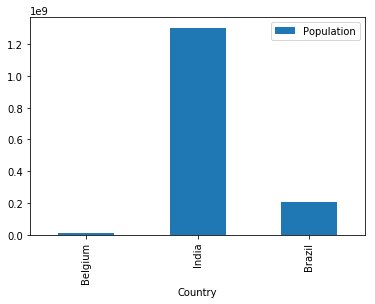

In [18]:
import matplotlib.pyplot as plt

donnees_h={'Country': ['Belgium',  'India',  'Brazil'],

'Capital': ['Brussels',  'New Delhi',  'Brasilia'],

'Population': [11190846, 1303171035, 207847528]}


dfh= pd.DataFrame(donnees_h)
print(dfh)

dfh.plot.bar(x= 'Country', y='Population')

plt.show()

#Apparement cette platforme ne permet pas d'afficher ce graphique sans importer matplotlib auapravant

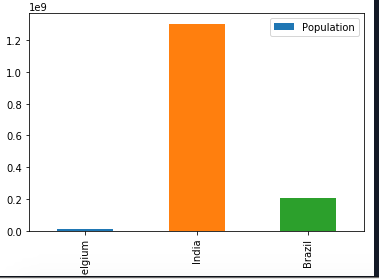

#### Fonctions mathématiques

Pandas permet également de réaliser des  opérations mathématiques. Médiane, moyenne, somme, écart type, variance etc... On peut par exemple calculer la médiane et l'écart type de la population du dataframe dfh


In [38]:
mediane= dfh['Population'].median()

print(mediane)

print()
ecart_type= dfh['Population'].std()

print(ecart_type)

207847528.0

696134594.7840002


### Manipuler, réorganiser le Dataframe

On peut réarranger son dataframe très facilement et rapidement à l'aide de plusieurs méthodes et fonctions

#### Editer/nettoyer le contenu du dataframe

* On peut déjà commencer par ordonner par ordre croissant les colonnes qui peuvent l'être afin de faciliter la lecture du dataframe en vue de prochaines manipulations: 

_df.sort_values_(by='colonne',ascending=True), l'argument ascending est True par défaut, nul besoin de le mentionner si on veut ordonner les données par ordre croissant, on le met en revanche False si on veut que l'ordre soit décroissant. 

* La plupart du temps il est nécessaire d'avoir un tableau propre, ne comportant pas de cases vides/nulles. On peut soit décider de supprimer les lignes comportant des cases vides  _df.dropna()_
ou les remplir avec quelque chose  _df.fillna(value)_.

ex: ordonner les pays par population et ordre croissant (seule variable ordinale du dataframe)

In [74]:
dfh.sort_values(by='Population')

,Capital,Country,Population
0,Brussels,Belgium,11190846
2,Brasilia,Brazil,207847528
1,New Delhi,India,1303171035


#### Jouer avec différents tableaux

Coller des tables les unes avec les autres, faire des jointures, des intersections, des unions se fait en une ligne de façon très simple avec Pandas

Cela prend tout son sens dès lors qu'on a chargé les données par morceaux 

On peut concaténer des lignes et des colonnes de différents dataframes avec pd.concat([df1,df2]) et pd.concat([df1,df2], axis=1)

Concaténons les dataframes que nous avons créé avant

Bien évidemment vu que les tableaux n'ont pas la même longueur il y aura plusieurs lignes vides

In [29]:
#On les reaffiche

print(tableau_Europe2)
print()
print(dfh)


     Capitale                Pays
0   Bruxelles            Belgique
1       Paris              France
2      Madrid             Espagne
3      Berlin           Allemagne
4     Londres     Grande Bretagne
5      Dublin             Irlande
6    Lisbonne            Portugal
7     Athènes               Grèce
8      Zurich              Suisse
9        Rome              Italie
10   Stocholm               Suède
11     Ankara             Turquie
12     Moscou              Russie
13     Zagreb             Croatie
14     Prague  République Tchèque
15     Barbes       Le cheikistan

     Capital  Country  Population
0   Brussels  Belgium    11190846
1  New Delhi    India  1303171035
2   Brasilia   Brazil   207847528


In [95]:
pd.concat([tableau_Europe2,dfh])# On concatène les lignes 

pd.concat([tableau_Europe2,dfh], axis=0)# on concatène les colonnes (axis= 1 les lignes s'affichent en haut, 
                                        # axis =0 elles s'affichent en bas)


,Capital,Capitale,Country,Pays,Population
0,NaN,Bruxelles,NaN,Belgique,NaN
1,NaN,Paris,NaN,France,NaN
2,NaN,Madrid,NaN,Espagne,NaN
3,NaN,Berlin,NaN,Allemagne,NaN
4,NaN,Londres,NaN,Grande Bretagne,NaN
5,NaN,Dublin,NaN,Irlande,NaN
6,NaN,Lisbonne,NaN,Portugal,NaN
7,NaN,Athènes,NaN,Grèce,NaN
8,NaN,Zurich,NaN,Suisse,NaN
9,NaN,Rome,NaN,Italie,NaN


Pour faire des opérations de jointure, d'intersection etc. Cet extrait d'un cheatsheet pandas semble très bien synthétiser ces opérations et leur utilité. 


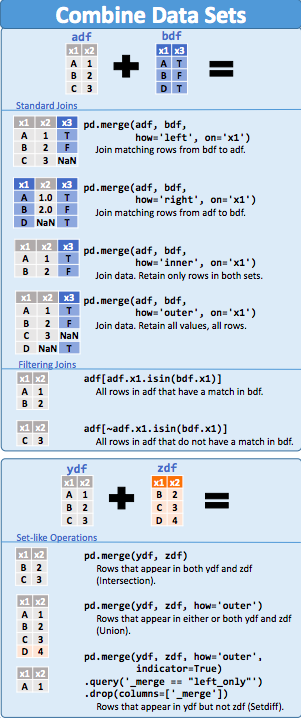

In [31]:
print(tableau_Europe)

print()

print (tableau_Europe2)

    Capitale       Pays
a  Bruxelles   Belgique
b      Paris     France
c     Madrid    Espagne
d     Berlin  Allemagne

     Capitale                Pays
0   Bruxelles            Belgique
1       Paris              France
2      Madrid             Espagne
3      Berlin           Allemagne
4     Londres     Grande Bretagne
5      Dublin             Irlande
6    Lisbonne            Portugal
7     Athènes               Grèce
8      Zurich              Suisse
9        Rome              Italie
10   Stocholm               Suède
11     Ankara             Turquie
12     Moscou              Russie
13     Zagreb             Croatie
14     Prague  République Tchèque
15     Barbes       Le cheikistan


In [32]:
pd.merge(tableau_Europe, tableau_Europe2, how= 'inner', on= 'Capitale') # On va sortir l'ensemble des lignes communes aux deux tableaux
                                                                    #En pratique il vaut mieux 
                                 
                                                                    #ne pas prendre des caractères pour une jointure en clé étrangère
#C'est équivalent ici à cette intersection: 

pd.merge(tableau_Europe, tableau_Europe2)     


,Capitale,Pays
0,Bruxelles,Belgique
1,Paris,France
2,Madrid,Espagne
3,Berlin,Allemagne


#### Conclusion

Pandas est la librairie idéale pour manipuler des données structurées. Cette librairie ayant été écrite à partir de Numpy, on peut facilement utiliser les fonctions de numpy avec Pandas.

Ce cheatsheet (officiel) de Pandas est très utile pour une prise en main rapide et pratique de la librairie: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf